#**Aula 1 - Conhecendo e preparando os dados**

##**Importando os dados**

O comando a seguir instala o pacote `ucimlrepo`, uma biblioteca que oferece acesso fácil a conjuntos de dados do repositório de aprendizado de máquina da [UCI](https://archive.ics.uci.edu/):

In [ ]:
!pip install ucimlrepo

Em seguida, utilizamos a biblioteca `ucimlrepo` para acessar um conjunto de dados específico do repositório de aprendizado de máquina UCI. O método `fetch_ucirepo(id=45)` é chamado para buscar o dataset identificado pelo número 45, que corresponde ao conjunto de dados sobre doenças cardíacas.

Após a obtenção desse dataset, o código imprime uma mensagem informando que as variáveis disponíveis no dataset de doenças cardíacas da UCI serão listadas. A linha final, `doenca_cardiaca.variables`, é responsável por exibir essas variáveis, fornecendo uma visão geral dos dados disponíveis para análise e estudo sobre doenças cardíacas:

In [ ]:
from ucimlrepo import fetch_ucirepo

doenca_cardiaca = fetch_ucirepo(id=45)
print('Variáveis disponíveis no dataset de doenças cardíacas da UCI:')
doenca_cardiaca.variables

Variáveis disponíveis no dataset de doenças cardíacas da UCI:


name     role  ...  units missing_values
0        age  Feature  ...  years             no
1        sex  Feature  ...   None             no
2         cp  Feature  ...   None             no
3   trestbps  Feature  ...  mm Hg             no
4       chol  Feature  ...  mg/dl             no
5        fbs  Feature  ...   None             no
6    restecg  Feature  ...   None             no
7    thalach  Feature  ...   None             no
8      exang  Feature  ...   None             no
9    oldpeak  Feature  ...   None             no
10     slope  Feature  ...   None             no
11        ca  Feature  ...   None            yes
12      thal  Feature  ...   None            yes
13       num   Target  ...   None             no

[14 rows x 7 columns]

Selecionando apenas três características: 'idade' (age), 'colesterol' (chol) e 'tipo de dor no peito' (cp), a partir do conjunto completo de dados:

In [ ]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

Visualizando os 5 primeiras linhas:

In [ ]:
X.head()

age  chol  cp
0   63   233   1
1   67   286   4
2   67   229   4
3   37   250   3
4   41   204   2

Obtendo o target e visualizando as 5 primeiras linhas:

In [ ]:
target = doenca_cardiaca.data.targets
target.head()

num
0    0
1    2
2    1
3    0
4    0

Utilizando a função `unique()` para identificar todos os valores únicos presentes na coluna `num` do DataFrame chamado `target`:

In [ ]:
target['num'].unique()

array([0, 2, 1, 3, 4])

Transformando a variável `target` em uma representação binária, onde todos os valores maiores que 0 são convertidos para 1, e os valores 0 ou menores permanecem como 0. Isso é feito multiplicando a condição (target > 0) por 1. Em seguida, utilizamos `target.head()` para exibir as primeiras cinco linhas do resultado, proporcionando uma visão rápida da transformação aplicada:






In [ ]:
target = (target > 0) * 1
target.head()

num
0    0
1    1
2    1
3    0
4    0

##**Explorando os dados**

Para facilitar a exploração dos dados, criamos uma cópia do DataFrame `X` para evitar modificar o original. Em seguida, adicionamos uma nova coluna chamada `y` ao DataFrame copiado, que contém os valores da variável target. Por fim, exibimos as primeiras cinco linhas do DataFrame modificado, permitindo uma rápida visualização dos dados incluindo a nova coluna:

In [ ]:
df = X.copy()
df['y'] = target
df.head()

age  chol  cp  y
0   63   233   1  0
1   67   286   4  1
2   67   229   4  1
3   37   250   3  0
4   41   204   2  0

Importando duas bibliotecas para visualização de dados em Python:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Gerando um boxplot com a biblioteca Seaborn, comparando a distribuição de idades entre indivíduos com e sem doença cardíaca:

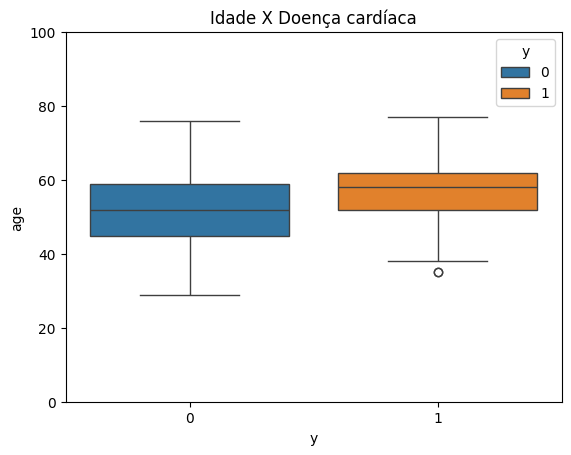

In [ ]:
sns.boxplot(x='y', y='age', hue='y', data=df)
plt.title('Idade X Doença cardíaca')
plt.ylim(0, 100)
plt.show()

Gerando um boxplot com a biblioteca Seaborn, comparando a distribuição dos níveis de colesterol entre indivíduos com e sem doença cardíaca:

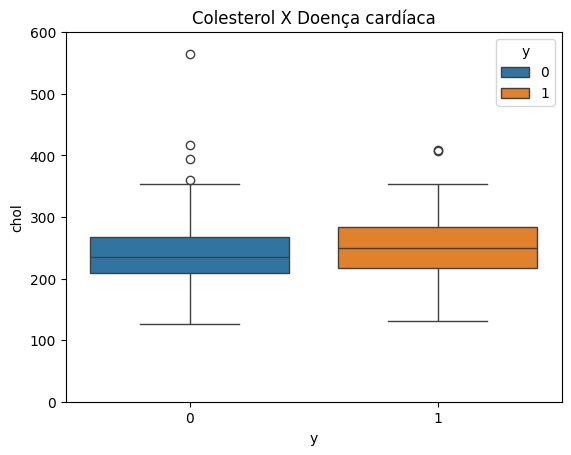

In [ ]:
sns.boxplot(x='y', y='chol', hue='y', data=df)
plt.title('Colesterol X Doença cardíaca')
plt.ylim(0,600)
plt.show()

Calculando a matriz de correlação entre três variáveis do DataFrame df: `age` (idade), `chol` (colesterol) e `y`:

In [ ]:
df[['age', 'chol', 'y']].corr()

age      chol         y
age   1.00000  0.208950  0.223120
chol  0.20895  1.000000  0.085164
y     0.22312  0.085164  1.000000

##**Preparando os dados**

Utilizando a função `unique()` para identificar todos os valores únicos presentes na coluna `cp` do DataFrame `X`:

In [ ]:
X['cp'].unique()

array([1, 4, 3, 2])

Utilizando a biblioteca Pandas para transformar a coluna `cp` do DataFrame `X` em variáveis dummy. Isso é feito pelo método `get_dummies`, que cria novas colunas para cada valor único presente na coluna `cp`, prefixando o nome dessas novas colunas com `cp`. Por fim, `head()` é utilizado para exibir as primeiras cinco linhas do DataFrame resultante, permitindo-nos visualizar a transformação realizada:

In [ ]:
import pandas as pd

df_cp = pd.get_dummies(X['cp'], prefix='cp')
df_cp.head()

cp_1  cp_2  cp_3  cp_4
0     1     0     0     0
1     0     0     0     1
2     0     0     0     1
3     0     0     1     0
4     0     1     0     0

Removendo a coluna `cp` do DataFrame `X` utilizando a função `.drop()`, especificando o parâmetro `axis=1` para indicar que uma coluna será removida.

Em seguida, o DataFrame `X` é atualizado pela junção com o DataFrame `df_cp` através da função `.join(`). O resultado dessa operação é exibido utilizando `.head()`, que mostra as primeiras cinco linhas do DataFrame modificado:

In [ ]:
X = X.drop('cp', axis=1).join(df_cp)
X.head()

age  chol  cp_1  cp_2  cp_3  cp_4
0   63   233     1     0     0     0
1   67   286     0     0     0     1
2   67   229     0     0     0     1
3   37   250     0     0     1     0
4   41   204     0     1     0     0